1/ Implement the Otsu algorithm and apply it for lung segmentation in chest X-rays (Chest_UoC_paxx.img, these are raw images with the size of 440x440, 16-unsigned bit pixels). Apply it for lung segmentation in images Chest_HoanMy_xxx. Comment on results <br/>

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.transform import resize
from skimage.color import rgb2gray

In [4]:
def thresholding(f, L):
    # create a new image with ONES
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 0 the pixels below the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr

def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        # computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        # computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]

    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

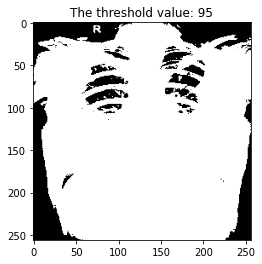

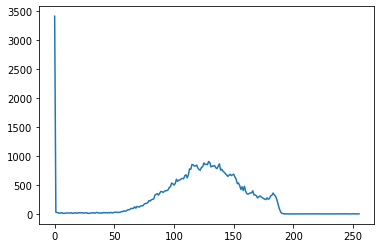

In [5]:
##img = io.imread('D:\studies\word_image_generator-master/Liver_MRI0001/phase1/img0059.dcm')
image = np.array(Image.open('D:\studies\word_image_generator-master/Chest_HoanMy_98.jpg').convert('L').resize((256,256)))

img, threshold = otsu_threshold(image, 255)


plt.imshow(img, cmap='Greys_r')
plt.title('The threshold value: '+ str(threshold))
plt.draw()
plt.show()

histogram, bin_edges = np.histogram(image, bins=256, range=(0,256))
plt.figure()
plt.plot(bin_edges[0:-1], histogram) 
plt.show()


The algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background. The threshold is chosen optimally in the sense that the “overlap” between two classes, set of foreground and background pixels, is minimized. So the object is separate from the background, the lung is also distinguishable from the body object.